In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spam.tsv', sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


Length can give us some insight

In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Highly imbalanced data

Downsampling

In [17]:
hem = df[df['label']=='ham']
hem = hem.sample(747)
data = hem.append(df[df['label']=='spam'])

[]

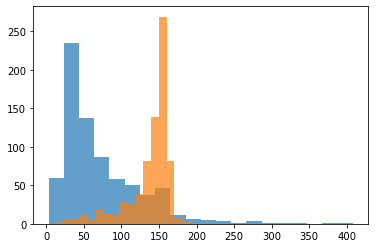

In [18]:
plt.hist(data[data['label']=='ham']['length'], bins=20, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=20, alpha=0.7)
plt.plot()

As the message length increases it can be spam

[]

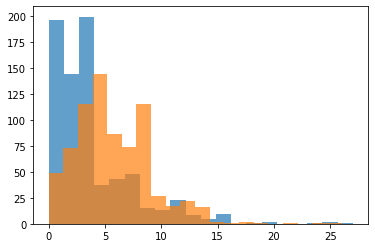

In [19]:
plt.hist(data[data['label']=='ham']['punct'], bins=20, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=20, alpha=0.7)
plt.plot()

#### Preprocessing of data

In [22]:
import nltk
import re

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RUPESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

In [26]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

Taking one message

In [31]:
review = data.iloc[0,1]

only accepting alphabets regecting all

In [33]:
review = re.sub('[^a-zA-Z]', ' ', review)

putting all string to lower case

In [34]:
review = review.lower()

In [36]:
review = review.split()

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
review_s=[]
for word in review:
    if word not in stopwords.words('english'):
        review_s.append(word)

In [40]:
review_s

['sorry',
 'c',
 'ur',
 'msg',
 'yar',
 'lor',
 'poor',
 'thing',
 'one',
 'night',
 'tmr',
 'u',
 'brand',
 'new',
 'room',
 'sleep']

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
review = [ps.stem(word) for word in review_s]

In [42]:
review

['sorri',
 'c',
 'ur',
 'msg',
 'yar',
 'lor',
 'poor',
 'thing',
 'one',
 'night',
 'tmr',
 'u',
 'brand',
 'new',
 'room',
 'sleep']

In [44]:
review = ' '.join(review) 

Looping preprocessing for whole data

In [53]:
corp = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i,1])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review) 
    corp.append(review)

In [54]:
corp

['sorri c ur msg yar lor poor thing one night tmr u brand new room sleep',
 'ok go sleep hope meet',
 'mani day sinc',
 'ok lar u sleep earli nite',
 'much blackberri bold nigeria',
 'aww first time u said u miss without ask miss u first love',
 'get hep b immunis nigeria',
 'cant think anyon spare room top head',
 'av new number wil u use one ta',
 'merri christma u anni',
 'got hella ga money want go grand natur adventur galileo littl bit',
 'yuou work get pc mom find spot would work need',
 'sorri complet forgot pop em round week still',
 'well welp sort semiobscur internet thing',
 'haf msn yiju hotmail com',
 'motiv behind everi dark shine light wait find behind everi best friend alway trust love bslvyl',
 'yup next stop',
 'sweet well princess pleas tell like dislik bed',
 'arun u transfr amt',
 'ok call mom instead fun',
 'waaaat lololo ok next time',
 'chill anoth hr could sleep pain surgic emerg see unfold okay',
 'sorri vikki watch olav mandara movi kano trishul theatr wit fr

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

In [79]:
X = cv.fit_transform(corp).toarray()

In [80]:
y = pd.get_dummies(data['label'])

In [81]:
y = y.iloc[:,0].values

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Using Naive Bayes Algorithm

In [83]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [84]:
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [86]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9297658862876255
[[138  10]
 [ 11 140]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       148
           1       0.93      0.93      0.93       151

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



Using Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [88]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [89]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.959866220735786
[[138  10]
 [  2 149]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       148
           1       0.94      0.99      0.96       151

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



Using SVM

In [90]:
from sklearn.svm import SVC
svm = SVC() 

In [91]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [92]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9264214046822743
[[137  11]
 [ 11 140]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       148
           1       0.93      0.93      0.93       151

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

